In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
xgb_BO_df = pd.read_csv("xgbBO.csv", sep = ',')
lgb_BO_df = pd.read_csv("lgbBO.csv", sep = ',')
xgb_DE_df = pd.read_csv("xgbDE.csv", sep = ',')
lgb_DE_df = pd.read_csv("lgbDE.csv", sep = ',')


xgb_BO_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
lgb_BO_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
xgb_DE_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
lgb_DE_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
xgb_BO_df.head()

,auc,colsample_bytree,gamma,max_depth,min_child_weight,subsample
0,87.528803,0.0,4.547212,5.379482,4.409817,0.956495
1,87.333586,0.0,3.710075,6.044677,7.519707,0.550830
2,87.000576,0.0,8.111586,9.152085,4.932330,0.932181
3,88.079999,0.0,2.310246,9.689783,2.132742,0.879020
4,87.379510,0.0,5.547853,6.917406,4.196711,0.723261


In [7]:
xgb_BO_df.drop(xgb_BO_df.index[0])

,auc,colsample_bytree,gamma,max_depth,min_child_weight,subsample
1,87.333586,0.0,3.710075e+00,6.044677,7.519707,0.550830
2,87.000576,0.0,8.111586e+00,9.152085,4.932330,0.932181
3,88.079999,0.0,2.310246e+00,9.689783,2.132742,0.879020
4,87.379510,0.0,5.547853e+00,6.917406,4.196711,0.723261
5,88.757494,0.0,0.000000e+00,8.727450,1.136445,1.000000
6,88.895332,0.0,0.000000e+00,7.193276,2.678243,1.000000
7,88.872370,0.0,0.000000e+00,7.155934,1.853644,1.000000
8,88.895332,0.0,0.000000e+00,7.746196,2.536717,1.000000
9,88.895332,0.0,3.022915e-07,7.759351,2.831769,1.000000
10,89.400604,0.0,1.204727e-02,7.431935,3.469749,0.962189


In [22]:
varx1 = xgb_BO_df['colsample_bytree'].values
varx2 = xgb_BO_df['gamma'].values
varx3 = xgb_BO_df['max_depth'].values
varx4 = xgb_BO_df['min_child_weight'].values
varx5 = xgb_BO_df['subsample'].values
before_df = xgb_BO_df.drop(xgb_BO_df.index[[0]])
vary1 = before_df['colsample_bytree'].values
vary2 = before_df['gamma'].values
vary3 = before_df['max_depth'].values
vary4 = before_df['min_child_weight'].values
vary5 = before_df['subsample'].values


vary2

array([3.71007494e+00, 8.11158642e+00, 2.31024642e+00, 5.54785266e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.02291454e-07, 1.20472743e-02, 1.91958209e+00, 1.24798087e+00,
       0.00000000e+00, 5.66589756e+00, 0.00000000e+00, 2.24756153e-01,
       2.15376774e-01, 0.00000000e+00, 1.10381680e-01, 1.64594596e-01,
       3.05450189e-01, 3.27088070e-01, 1.54609461e-02, 3.97974358e+00,
       7.97161600e-01, 1.10535857e+00, 6.96076063e+00, 3.53457892e-01,
       1.77331768e+00, 4.15775012e-01, 4.93213032e+00, 8.54324022e-01,
       0.00000000e+00, 6.44012187e-01, 0.00000000e+00, 2.04844408e+00,
       3.58629732e+00, 8.91296315e-02, 6.71145656e-01, 4.72744414e-01,
       7.03145632e-01, 4.14388063e+00, 7.78865295e-01, 2.77029426e-01,
       2.94798246e-01, 6.05415059e-01, 0.00000000e+00, 5.28795170e-01,
       1.90945975e-01, 7.34952541e-01, 0.00000000e+00, 5.61735306e+00,
       1.39236362e-01, 5.31981697e-01, 3.14147797e-01, 0.00000000e+00,
      

In [26]:
varx2

array([4.54721195e+00, 3.71007494e+00, 8.11158642e+00, 2.31024642e+00,
       5.54785266e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.02291454e-07, 1.20472743e-02, 1.91958209e+00,
       1.24798087e+00, 0.00000000e+00, 5.66589756e+00, 0.00000000e+00,
       2.24756153e-01, 2.15376774e-01, 0.00000000e+00, 1.10381680e-01,
       1.64594596e-01, 3.05450189e-01, 3.27088070e-01, 1.54609461e-02,
       3.97974358e+00, 7.97161600e-01, 1.10535857e+00, 6.96076063e+00,
       3.53457892e-01, 1.77331768e+00, 4.15775012e-01, 4.93213032e+00,
       8.54324022e-01, 0.00000000e+00, 6.44012187e-01, 0.00000000e+00,
       2.04844408e+00, 3.58629732e+00, 8.91296315e-02, 6.71145656e-01,
       4.72744414e-01, 7.03145632e-01, 4.14388063e+00, 7.78865295e-01,
       2.77029426e-01, 2.94798246e-01, 6.05415059e-01, 0.00000000e+00,
       5.28795170e-01, 1.90945975e-01, 7.34952541e-01, 0.00000000e+00,
       5.61735306e+00, 1.39236362e-01, 5.31981697e-01, 3.14147797e-01,
      

In [29]:
vary2

array([3.71007494e+00, 8.11158642e+00, 2.31024642e+00, 5.54785266e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.02291454e-07, 1.20472743e-02, 1.91958209e+00, 1.24798087e+00,
       0.00000000e+00, 5.66589756e+00, 0.00000000e+00, 2.24756153e-01,
       2.15376774e-01, 0.00000000e+00, 1.10381680e-01, 1.64594596e-01,
       3.05450189e-01, 3.27088070e-01, 1.54609461e-02, 3.97974358e+00,
       7.97161600e-01, 1.10535857e+00, 6.96076063e+00, 3.53457892e-01,
       1.77331768e+00, 4.15775012e-01, 4.93213032e+00, 8.54324022e-01,
       0.00000000e+00, 6.44012187e-01, 0.00000000e+00, 2.04844408e+00,
       3.58629732e+00, 8.91296315e-02, 6.71145656e-01, 4.72744414e-01,
       7.03145632e-01, 4.14388063e+00, 7.78865295e-01, 2.77029426e-01,
       2.94798246e-01, 6.05415059e-01, 0.00000000e+00, 5.28795170e-01,
       1.90945975e-01, 7.34952541e-01, 0.00000000e+00, 5.61735306e+00,
       1.39236362e-01, 5.31981697e-01, 3.14147797e-01, 0.00000000e+00,
      

In [27]:
vary2 = np.append(vary2, vary2[-1])



In [30]:
diff2 = vary2-varx2

In [32]:
diff2 = diff2 * diff2

In [33]:
diff2

array([7.00798378e-01, 1.93733033e+01, 3.36555458e+01, 1.04820942e+01,
       3.07786691e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.13801234e-14, 1.45129535e-04, 3.63868907e+00, 4.51048197e-01,
       1.55745625e+00, 3.21023952e+01, 3.21023952e+01, 5.05153285e-02,
       8.79727633e-05, 4.63871546e-02, 1.21841154e-02, 2.93904019e-03,
       1.98402983e-02, 4.68197854e-04, 9.71114641e-02, 1.57155368e+01,
       1.01288281e+01, 9.49853704e-02, 3.42857333e+01, 4.36564494e+01,
       2.01600182e+00, 1.84292210e+00, 2.03974653e+01, 1.66285042e+01,
       7.29869534e-01, 4.14751697e-01, 4.14751697e-01, 4.19612315e+00,
       2.36499257e+00, 1.22301818e+01, 3.38742653e-01, 3.93630529e-02,
       5.30847215e-02, 1.18386573e+01, 1.13233282e+01, 2.51839239e-01,
       3.15730953e-04, 9.64828044e-02, 3.66527393e-01, 2.79624332e-01,
       1.14142079e-01, 2.95943144e-01, 5.40155238e-01, 3.15546554e+01,
       3.00097625e+01, 1.54248898e-01, 4.74516078e-02, 9.86888385e-02,
      

In [42]:
def get_distance(df) : 
    before_df = df.drop(df.index[[0]])
    varx1 = df['colsample_bytree'].values
    varx2 = df['gamma'].values
    varx3 = df['max_depth'].values
    varx4 = df['min_child_weight'].values
    varx5 = df['subsample'].values
    vary1 = before_df['colsample_bytree'].values
    vary2 = before_df['gamma'].values
    vary3 = before_df['max_depth'].values
    vary4 = before_df['min_child_weight'].values
    vary5 = before_df['subsample'].values
    
    vary1 = np.append(vary1, vary1[-1])
    vary2 = np.append(vary2, vary2[-1])
    vary3 = np.append(vary3, vary3[-1])
    vary4 = np.append(vary4, vary4[-1])
    vary5 = np.append(vary5, vary5[-1])
    
    diff1 = varx1 - vary1
    diff2 = varx2 - vary2
    diff3 = varx3 - vary3
    diff4 = varx4 - vary4
    diff5 = varx5 - vary5
    
    diff1 = diff1 * diff1
    diff2 = diff2 * diff2
    diff3 = diff3 * diff3
    diff4 = diff4 * diff4
    diff5 = diff5 * diff5
    
    dist_square = diff1 + diff2 + diff3 + diff4 + diff5
    dist = np.sqrt(dist_square)
    
    return dist
    

In [50]:
xgbBOdist = get_distance(xgb_BO_df)
lgbBOdist = get_distance(lgb_BO_df)
xgbBOauc = xgb_BO_df['auc'].values
lgbBOauc = lgb_BO_df['auc'].values

BOplot_df = pd.DataFrame({'step' : np.arange(155), 'distance(XGB)' : xgbBOdist, 'distance(LGB)' : lgbBOdist, 'AUC(XGB)' : xgbBOauc, 'AUC(LGB)' : lgbBOauc })
BOplot_df.head()

,AUC(LGB),AUC(XGB),distance(LGB),distance(XGB),step
0,88.286625,87.528803,13.948407,3.313497,0
1,86.311350,87.333586,3.518107,5.989093,1
2,88.872344,87.000576,7.672552,6.464146,2
3,80.948542,88.079999,8.846524,4.738396,3
4,88.895313,87.379510,5.298384,6.595206,4


In [92]:
def best_member_of_generation(df, popsize) : 
    itermax = len(df) / popsize
    
    
    for i in range(int(itermax)) : 
        front = i * popsize
        back = front + popsize
        
        tmp_df = df[front : back]
        tmp_df.sort_values(by = ['auc'], ascending= False, inplace = True)
        tmp_df.reset_index(inplace = True, drop = True)
        
        if i == 0 : 
            best = tmp_df[0:1]
        else : 
            tmp_best = tmp_df[0:1]
            best = best.append(tmp_best)
            best.reset_index(inplace = True, drop = True)
    print(best)
    
    return best

In [93]:
xgb_DE_generation = best_member_of_generation(xgb_DE_df, 150)
lgb_DE_generation = best_member_of_generation(lgb_DE_df, 150)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


         auc  colsample_bytree     gamma  max_depth  min_child_weight  \
0  89.722127               0.0  0.279059   9.457789          8.281415   
1  89.848504               0.0  0.111846   9.987087          6.890579   
2  89.986217               0.0  0.064654   7.009771          1.532439   
3  89.963341               0.0  0.148291   8.085822         15.704755   
4  90.112529               0.0  0.225359   8.633429         10.942211   
5  90.009265               0.0  0.208214   8.150470          4.516164   
6  89.974802               0.0  0.280662   7.948164         19.793872   
7  90.066697               0.0  0.268339   8.330625          8.455319   
8  90.261947               0.0  0.177020   7.750252          2.869173   
9  90.181560               0.0  0.186304   7.313546          2.172210   

   subsample  
0   0.632635  
1   0.617655  
2   0.799579  
3   0.824811  
4   0.851776  
5   0.786978  
6   0.869635  
7   0.931906  
8   0.938087  
9   0.932677  
         auc  colsample_bytree 

In [96]:
lgb_DE_generation.head(100)

,auc,colsample_bytree,gamma,max_depth,min_child_weight,subsample
0,89.779525,0.0,9.789058,9.407737,19.995885,0.941457
1,89.607316,0.0,6.841894,9.430348,16.880095,0.966625
2,89.791040,0.0,6.984983,9.144133,18.594105,0.926034
3,89.836990,0.0,0.291539,9.032265,10.072527,0.874343
4,89.676242,0.0,3.713049,9.312677,11.199910,0.750530
5,89.871394,0.0,8.951176,9.870587,5.939891,0.942733
6,89.836977,0.0,8.951176,9.308875,5.939891,0.846083
7,89.859919,0.0,8.468989,9.906707,17.209035,0.935895
8,89.894362,0.0,2.671570,9.703532,3.169975,0.948497
9,89.837003,0.0,1.068115,9.608271,19.249705,0.947660


In [98]:
xgbDEdist = get_distance(xgb_DE_generation)
lgbDEdist = get_distance(lgb_DE_generation)
xgbDEauc = xgb_DE_generation['auc'].values
lgbDEauc = lgb_DE_generation['auc'].values

DEplot_df = pd.DataFrame({'step' : np.arange(10), 'distance(XGB)' : xgbDEdist, 'distance(LGB)' : lgbDEdist, 'AUC(XGB)' : xgbDEauc, 'AUC(LGB)' : lgbDEauc })
DEplot_df.head()

,AUC(LGB),AUC(XGB),distance(LGB),distance(XGB),step
0,89.779525,89.722127,4.288947,1.497587,0
1,89.607316,89.848504,1.744097,6.132650,1
2,89.791040,89.986217,10.836728,14.213377,2
3,89.836990,89.963341,3.615479,4.794619,3
4,89.676242,90.112529,7.446744,6.444518,4


In [113]:


def show_plots(df, titlename, aucrange) : 
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}
    plt.rc('font', **font)



    fig1 = plt.figure(figsize = (20, 10))

    ax1 = fig1.add_subplot(111)
    ax1.plot( 'step', 'AUC(LGB)',  data= df, color='blue', linewidth=2)
    ax1.plot( 'step', 'AUC(XGB)',  data= df, color='red', linewidth=2)
    #plt.plot(x[0], y[0], 'g*')
    ax1.set_ylabel('AUC')
    ax1.set_ylim(aucrange)
    ax1.grid()
    plt.legend()
    plt.xlabel('Step #')
    plt.title(titlename+' AUC result')
    plt.savefig(titlename+'AUCresult.png')

    fig2 = plt.figure(figsize = (20, 10))
    ax1 = fig2.add_subplot(111)
    ax1.plot( 'step', 'distance(LGB)',  data=df, color='blue', linewidth=2)
    ax1.plot( 'step', 'distance(XGB)',  data=df, color='red', linewidth=2)
    ax1.set_ylim([0,20])
    ax1.set_ylabel('Step Distance')
    ax1.grid()
    plt.legend()
    plt.xlabel('Step #')

    plt.title(titlename+' Stepsize')
    plt.savefig(titlename+'stepsize.png')
    plt.show()
    

    return 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


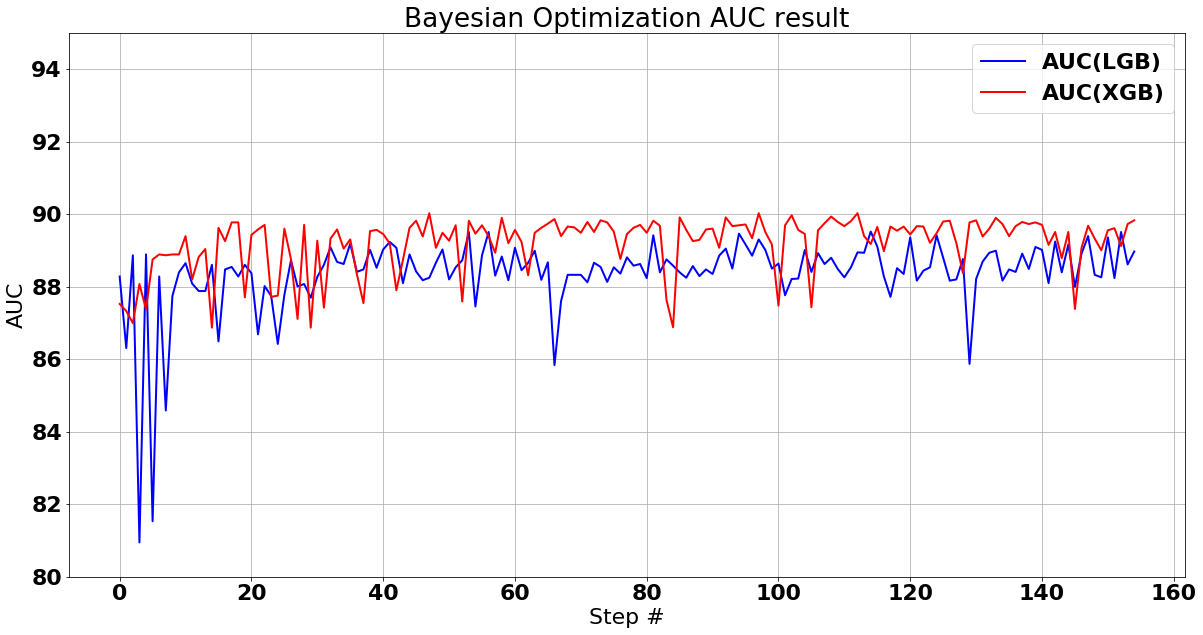

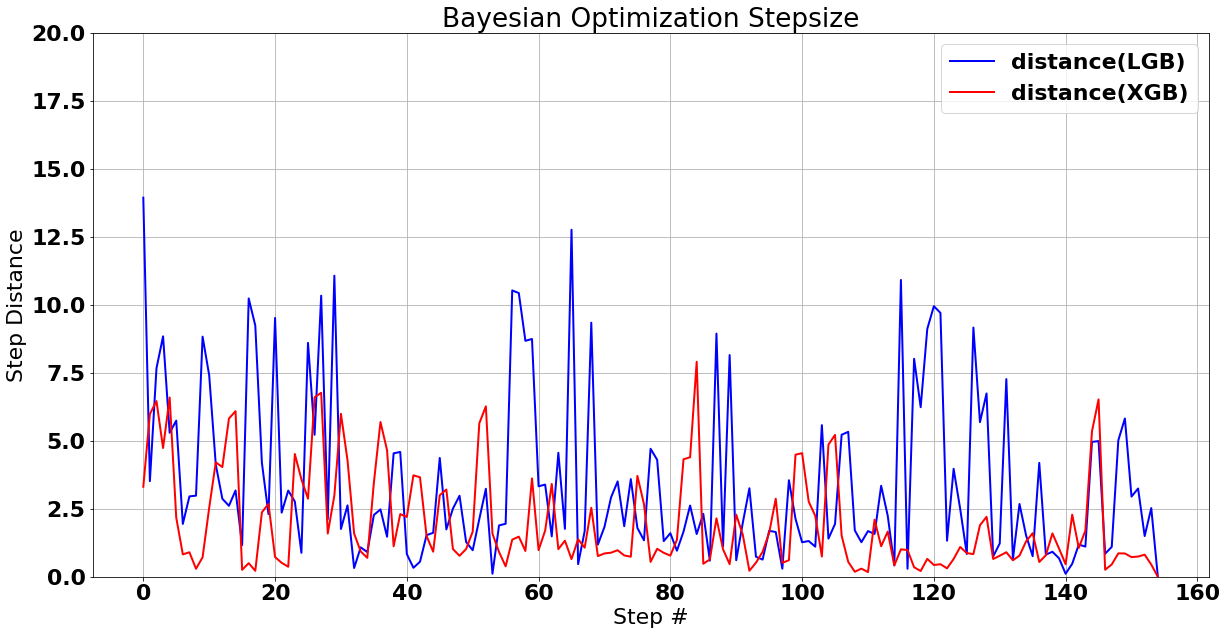

0

In [114]:
show_plots(BOplot_df, "Bayesian Optimization", [80,95])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


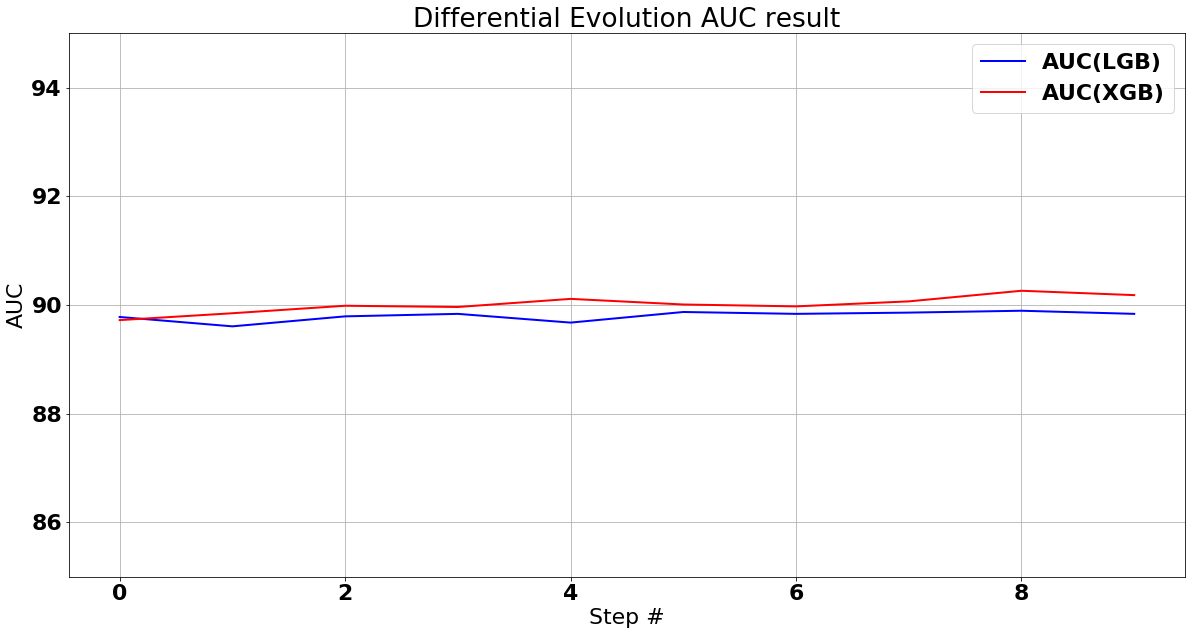

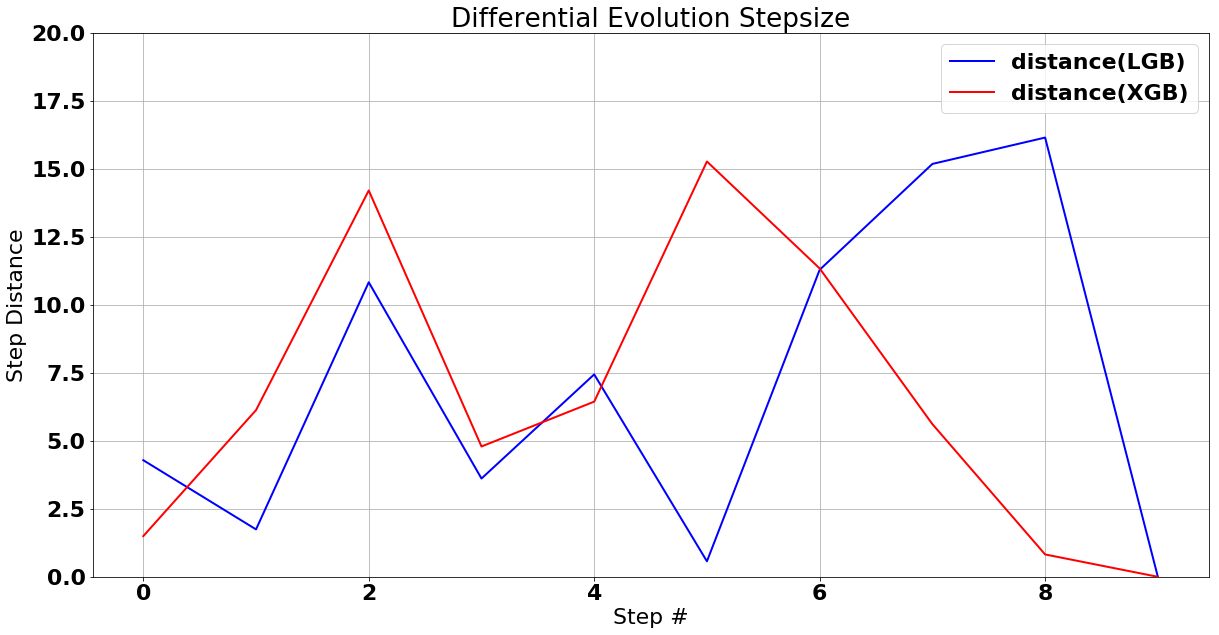

0

In [116]:
show_plots(DEplot_df, "Differential Evolution", [85,95])